In [1]:
#import directory
import tweepy
import configparser
from tweepy import OAuthHandler
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
config = configparser.ConfigParser()
config.read('config.txt')

[]

In [3]:
#twitter consumer key and access tokens to be entered
consumerKey= ""
consumerSecret=""
accessToken=""
accessTokenSecret=""

In [4]:
#authentication
authenticate= tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [7]:
#searching for tweets
search_term='#bitcoin -filter:retweets'
tweets = tweepy.Cursor(api.search,q=search_term,lang="en",since='2018-11-01',tweet_mode="extended" ).items(2000)
all_tweets=[tweet.full_text for tweet in tweets]

In [8]:
df= pd.DataFrame(all_tweets, columns= ['Tweets'])
df.head(5)

,Tweets
0,#Bitcoin Last Price $20030 #BTC 🚀\nDaily Indic...
1,"@jevidon ""#Bitcoin is the most important proje..."
2,"@elonmusk Guys who can, send me Bitcoin please..."
3,Crypto ❤\n\n#BTC #Bitcoin $BTC $ETH #ETH #Ethe...
4,@BTC_Archive Its colored relief cheques to tra...


In [9]:
#function for cleaning the tweet
def cleanTwt(twt):
  twt=re.sub('#bitcoin','bitcoin',twt)
  twt=re.sub('#Bitcoin','Bitcoin',twt)
  twt=re.sub('#[A-Za-z0-9]+','',twt)
  twt=re.sub('\\n','',twt)
  twt=re.sub('https?:\/\/\S+','',twt)
  return twt


In [14]:
df['Cleaned_Tweets']=df['Tweets'].apply(cleanTwt)
df.head(10)

,Tweets,clean_Tweets,Cleaned_Tweets
0,#Bitcoin Last Price $20030 #BTC 🚀\nDaily Indic...,Bitcoin Last Price $20030 🚀Daily Indicators:•...,Bitcoin Last Price $20030 🚀Daily Indicators:•...
1,"@jevidon ""#Bitcoin is the most important proje...","@jevidon ""Bitcoin is the most important projec...","@jevidon ""Bitcoin is the most important projec..."
2,"@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please..."
3,Crypto ❤\n\n#BTC #Bitcoin $BTC $ETH #ETH #Ethe...,Crypto ❤ Bitcoin $BTC $ETH,Crypto ❤ Bitcoin $BTC $ETH
4,@BTC_Archive Its colored relief cheques to tra...,@BTC_Archive Its colored relief cheques to tra...,@BTC_Archive Its colored relief cheques to tra...
5,Almost $40 Billion in #Bitcoin Net Realized Lo...,Almost $40 Billion in Bitcoin Net Realized Los...,Almost $40 Billion in Bitcoin Net Realized Los...
6,@Mic2k1 @MoheganNft #Bitcoin hit rock bottom. ...,@Mic2k1 @MoheganNft Bitcoin hit rock bottom. L...,@Mic2k1 @MoheganNft Bitcoin hit rock bottom. L...
7,"@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please..."
8,"@TheMoonCarl ""#Bitcoin is the most important p...","@TheMoonCarl ""Bitcoin is the most important pr...","@TheMoonCarl ""Bitcoin is the most important pr..."
9,@coinrbicom Check out @draculawallet\n\n#Cheet...,@coinrbicom Check out @draculawallet bi...,@coinrbicom Check out @draculawallet bi...


In [15]:
#analysis based on subjectivity and polarity
def getSubjectivity (twt):
  return TextBlob(twt).sentiment.subjectivity
def getPolarity (twt):
  return TextBlob(twt).sentiment.polarity
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)
df.head()

,Tweets,clean_Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,#Bitcoin Last Price $20030 #BTC 🚀\nDaily Indic...,Bitcoin Last Price $20030 🚀Daily Indicators:•...,Bitcoin Last Price $20030 🚀Daily Indicators:•...,0.044444,0.0
1,"@jevidon ""#Bitcoin is the most important proje...","@jevidon ""Bitcoin is the most important projec...","@jevidon ""Bitcoin is the most important projec...",0.533333,0.3
2,"@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please...",0.000000,0.0
3,Crypto ❤\n\n#BTC #Bitcoin $BTC $ETH #ETH #Ethe...,Crypto ❤ Bitcoin $BTC $ETH,Crypto ❤ Bitcoin $BTC $ETH,0.000000,0.0
4,@BTC_Archive Its colored relief cheques to tra...,@BTC_Archive Its colored relief cheques to tra...,@BTC_Archive Its colored relief cheques to tra...,0.000000,0.0


In [18]:
#defining parameters to decide the score 
def getSentiment (score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

In [19]:
df['Sentiment'] =df['Polarity'].apply(getSentiment)
df.head()

,Tweets,clean_Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,#Bitcoin Last Price $20030 #BTC 🚀\nDaily Indic...,Bitcoin Last Price $20030 🚀Daily Indicators:•...,Bitcoin Last Price $20030 🚀Daily Indicators:•...,0.044444,0.0,Neutral
1,"@jevidon ""#Bitcoin is the most important proje...","@jevidon ""Bitcoin is the most important projec...","@jevidon ""Bitcoin is the most important projec...",0.533333,0.3,Positive
2,"@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please...","@elonmusk Guys who can, send me Bitcoin please...",0.000000,0.0,Neutral
3,Crypto ❤\n\n#BTC #Bitcoin $BTC $ETH #ETH #Ethe...,Crypto ❤ Bitcoin $BTC $ETH,Crypto ❤ Bitcoin $BTC $ETH,0.000000,0.0,Neutral
4,@BTC_Archive Its colored relief cheques to tra...,@BTC_Archive Its colored relief cheques to tra...,@BTC_Archive Its colored relief cheques to tra...,0.000000,0.0,Neutral


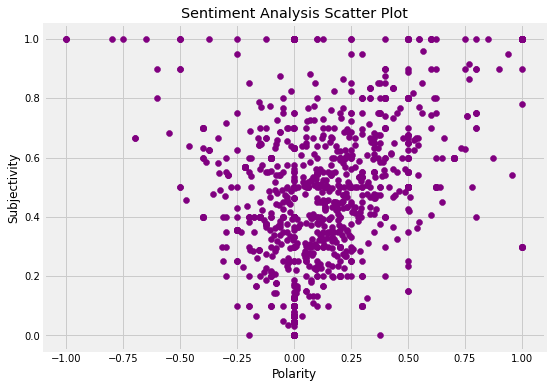

In [22]:
#plot
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

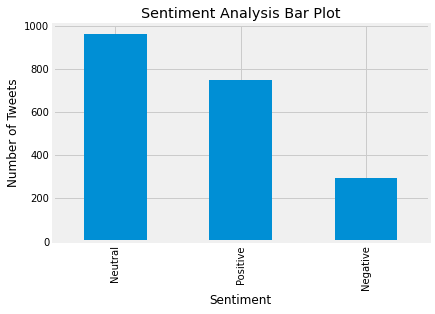

In [23]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()